In [15]:
%reset -sf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
path = Path('/kaggle/input/ecommerce-sales-dataset')
list(path.glob('*'))

from pandas import read_csv, DataFrame, Series
from pandas import to_datetime


basketdf = pd.read_csv('./data/basket_details.csv')
customerdf = pd.read_csv('./data/customer_details.csv')

[]

In [14]:
customerdf

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88
...,...,...,...,...
19995,12557307,Male,41.0,52
19996,12595961,Male,29.0,52
19997,12520991,Male,35.0,52
19998,12612719,Male,39.0,52


In [17]:
basketdf['basket_date'] = to_datetime(basketdf['basket_date'], errors='coerce')
basketdf

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2
...,...,...,...,...
14995,8336862,50977318,2019-05-26,2
14996,9500785,43862061,2019-05-26,2
14997,22787344,6041664,2019-05-26,2
14998,8221263,3597369,2019-05-26,2


In [18]:
# First trying to find customers in baskets
cids = Series(customerdf['customer_id'].unique())
bids = Series(basketdf['customer_id'].unique())

cids.isin(bids).sum()
bids.isin(cids).sum()


64

64

In [19]:
# So out of al 15,000 basket data only 64 had customer data

In [20]:
basketdf['dayofweek'] = basketdf['basket_date'].dt.dayofweek
basketdf['isweekend'] = 0
mask = (basketdf['dayofweek']==5) | (basketdf['dayofweek']==6)
basketdf['isweekend'] = 0
basketdf.loc[mask, 'isweekend'] = 1

basketdf

,customer_id,product_id,basket_date,basket_count,dayofweek,isweekend
0,42366585,41475073,2019-06-19,2,2,0
1,35956841,43279538,2019-06-19,2,2,0
2,26139578,31715598,2019-06-19,3,2,0
3,3262253,47880260,2019-06-19,2,2,0
4,20056678,44747002,2019-06-19,2,2,0
...,...,...,...,...,...,...
14995,8336862,50977318,2019-05-26,2,6,1
14996,9500785,43862061,2019-05-26,2,6,1
14997,22787344,6041664,2019-05-26,2,6,1
14998,8221263,3597369,2019-05-26,2,6,1


In [21]:
from pandas import crosstab

In [22]:
crosstab(basketdf['dayofweek'], basketdf['isweekend'])

isweekend,0,1
dayofweek,,
0,3175,0
1,2732,0
2,1469,0
3,1023,0
4,1667,0
5,0,2207
6,0,2727


In [23]:
customerdf

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88
...,...,...,...,...
19995,12557307,Male,41.0,52
19996,12595961,Male,29.0,52
19997,12520991,Male,35.0,52
19998,12612719,Male,39.0,52


In [24]:
basketdf

,customer_id,product_id,basket_date,basket_count,dayofweek,isweekend
0,42366585,41475073,2019-06-19,2,2,0
1,35956841,43279538,2019-06-19,2,2,0
2,26139578,31715598,2019-06-19,3,2,0
3,3262253,47880260,2019-06-19,2,2,0
4,20056678,44747002,2019-06-19,2,2,0
...,...,...,...,...,...,...
14995,8336862,50977318,2019-05-26,2,6,1
14996,9500785,43862061,2019-05-26,2,6,1
14997,22787344,6041664,2019-05-26,2,6,1
14998,8221263,3597369,2019-05-26,2,6,1


In [25]:
# which persons only shop on weekends?

in_week_cids = Series(basketdf['customer_id'][basketdf['isweekend']==0].unique())
in_weekend_cids = Series(basketdf['customer_id'][basketdf['isweekend']==1].unique())

In [26]:
mask = in_weekend_cids.isin(in_week_cids)
cids_only_at_weekends = in_weekend_cids[~mask]
cids_only_at_weekends

0        7751651
1       23462918
3       44364979
4        9912477
5       25083717
          ...   
4717     2468899
4718    12066558
4719     8336862
4720     9500785
4721    22787344
Length: 4474, dtype: int64

In [27]:
basketdf['cids_only_at_weekends'] = 0
df_mask = basketdf['customer_id'].isin(cids_only_at_weekends)
basketdf.loc[df_mask, 'cids_only_at_weekends'] = 1

basketdf

,customer_id,product_id,basket_date,basket_count,dayofweek,isweekend,cids_only_at_weekends
0,42366585,41475073,2019-06-19,2,2,0,0
1,35956841,43279538,2019-06-19,2,2,0,0
2,26139578,31715598,2019-06-19,3,2,0,0
3,3262253,47880260,2019-06-19,2,2,0,0
4,20056678,44747002,2019-06-19,2,2,0,0
...,...,...,...,...,...,...,...
14995,8336862,50977318,2019-05-26,2,6,1,1
14996,9500785,43862061,2019-05-26,2,6,1,1
14997,22787344,6041664,2019-05-26,2,6,1,1
14998,8221263,3597369,2019-05-26,2,6,1,0


In [28]:
# this specific customer, 8221263 shops at both weekdays and weekends,
# Or they'll shop once a week.

In [29]:
check_cid = [8221263]
in_week_cids.isin(check_cid).sum()
in_weekend_cids.isin(check_cid).sum()

1

1

In [30]:
#this customer: 4912577, only shops on weekends

check_cid = [4912577]
in_week_cids.isin(check_cid).sum()
in_weekend_cids.isin(check_cid).sum()

0

1

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
prods = ohe.fit_transform(basketdf[['product_id']]).toarray()
prods

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X = DataFrame(prods)
X

,0,1,2,3,4,5,6,7,8,9,...,13151,13152,13153,13154,13155,13156,13157,13158,13159,13160
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X['customer_id'] = basketdf['customer_id']
X

,0,1,2,3,4,5,6,7,8,9,...,13152,13153,13154,13155,13156,13157,13158,13159,13160,customer_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42366585
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35956841
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26139578
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3262253
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8336862
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9500785
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22787344
14998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8221263


In [35]:
X['y'] = basketdf['cids_only_at_weekends']
X

,0,1,2,3,4,5,6,7,8,9,...,13153,13154,13155,13156,13157,13158,13159,13160,customer_id,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42366585,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35956841,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26139578,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3262253,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20056678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8336862,1
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9500785,1
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22787344,1
14998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8221263,0


In [37]:
from pandas import merge

X_ = merge(X, 
           customerdf[['customer_id', 'sex', 'customer_age', 'tenure']], 
           left_on=['customer_id'], 
           right_on=['customer_id'],
           #how='outer'
           )
X_ = X_.drop(['customer_id'], axis=1)
X_

,0,1,2,3,4,5,6,7,8,9,...,13155,13156,13157,13158,13159,13160,y,sex,customer_age,tenure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Male,40.0,114
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Male,30.0,63
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Female,51.0,62
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Male,42.0,117
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Male,45.0,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Male,33.0,52
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Male,46.0,37
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Male,29.0,41
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Male,29.0,76


In [39]:
y = X_[['y']]
X_ = X_.drop('y', axis=1)

In [40]:
X_.shape, y.shape

((72, 13164), (72, 1))

In [41]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

lb = LabelBinarizer()
X_['sex'] = lb.fit_transform(X_['sex'])
X_

,0,1,2,3,4,5,6,7,8,9,...,13154,13155,13156,13157,13158,13159,13160,sex,customer_age,tenure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,40.0,114
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,30.0,63
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51.0,62
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,42.0,117
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,45.0,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,33.0,52
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,46.0,37
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,29.0,41
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,29.0,76


In [42]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_[['sex', 'customer_age', 'tenure']], y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

est = LogisticRegressionCV(cv=6)
est.fit(X_train, y_train)
pred = est.predict(X_test)

print(classification_report(y_test, pred))

((57, 3), (15, 3), (57, 1), (15, 1))

LogisticRegressionCV(cv=6)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.17      0.29         6

    accuracy                           0.67        15
   macro avg       0.82      0.58      0.53        15
weighted avg       0.79      0.67      0.58        15



In [43]:
DataFrame(est.coef_, columns=['sex', 'customer_age', 'tenure']).T

,0
sex,0.578024
customer_age,-0.011647
tenure,0.011910


In [44]:
# if the customer is male, then its more likely they go weekend shopping
# the older the customer, the more likely they will go weekend shopping
# in terms of tenure, the higher the number the most likely to go weekend shopping

# one way to narrow this down is to get rid of the products that this sample of people did not buy

In [45]:
temp = X_.T.iloc[:13161, :]
temp.to_csv('temp.csv')

In [46]:
mask = temp==1
mask

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13156,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13157,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13158,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13159,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
mask.sum().sum()

72

In [48]:
# As we can see, all the products were purchased at some point. more columns than rows

<AxesSubplot:title={'center':'Sales Contribution By Sex'}, ylabel='sex'>

(-1.1047120547090497,
 1.1002243835575738,
 -1.1055091173688145,
 1.1049433068564363)

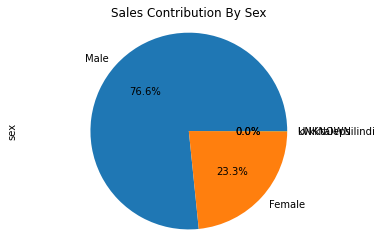

In [52]:
customerdf.sex.value_counts().plot.pie(autopct='%1.1f%%',
                                     title = "Sales Contribution By Sex")
plt.axis('equal')
plt.show()  

In [56]:
customerdf= customerdf.drop([customerdf.index[1201], customerdf.index[6133],customerdf.index[6443], customerdf.index[8481],customerdf.index[9283], customerdf.index[10035],customerdf.index[11102], customerdf.index[19785],customerdf.index[3597]])
customerdf

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88
...,...,...,...,...
19995,12557307,Male,41.0,52
19996,12595961,Male,29.0,52
19997,12520991,Male,35.0,52
19998,12612719,Male,39.0,52


<AxesSubplot:title={'center':'Sales Contribution By Sex'}, ylabel='sex'>

(-1.1047645010239604,
 1.100226905256321,
 -1.1055082094128985,
 1.1049222182120455)

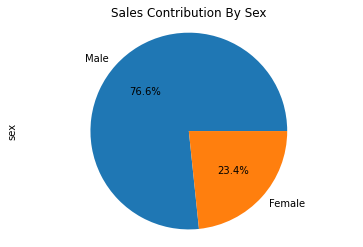

In [57]:
customerdf.sex.value_counts().plot.pie(autopct='%1.1f%%',
                                     title = "Sales Contribution By Sex")
plt.axis('equal')
plt.show()  